We compare the final distribution of simulated paralogs in the bidimensional space defined by transcription and translation rates.

The selected simulation runs are:

*   Minimal model at N = 10^6 -> sigma=0.025 and ratio=3
*   Precision-economy model at N = 10^6 -> sigma=0.025 and ratio=1
*   Minimal model at N = 10^5 -> sigma=0.075 and ratio=4
*   Precision-economy model at N = 10^5 -> sigma=0.075 and ratio=1/2

In [1]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 600
import seaborn as sns
from matplotlib import cm
from matplotlib import ticker

In [2]:
# Mounting my google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1) Importing the data

In [3]:
data_model = pd.DataFrame(columns=['Round', 'Couple', 'Bm1', 'Bp1',
                                   'Bm2', 'Bp2'])

data_min = data_model.copy()
data_min_1e5 = data_model.copy()
data_cost = data_model.copy()
data_cost_1e5 = data_model.copy()

In [4]:
for iter in [1, 2, 3]:

  df_min = pd.read_csv(f'/content/drive/My Drive/Redaction_SA/Final_figures_v2/Data_full_dists/data_all_Bm3_iter{iter}_0025_1e6.csv')
  df_min = df_min[df_min['Model'] == 'Minimal'].reset_index(drop=True)
  df_min = df_min[df_min['Round'] == df_min['Round'].max()].reset_index(drop=True)
  df_min[['Bm1', 'Bm2', 'Bp1', 'Bp2']] = np.log10(df_min[['Bm1', 'Bm2', 'Bp1', 'Bp2']])
  data_min = pd.concat([data_min, df_min], join='inner').reset_index(drop=True)

  df_min_1e5 = pd.read_csv(f'/content/drive/My Drive/Redaction_SA/Final_figures_v2/Data_full_dists/data_all_Bm4_iter{iter}_0075_1e5.csv')
  df_min_1e5 = df_min_1e5[df_min_1e5['Model'] == 'Minimal'].reset_index(drop=True)
  df_min_1e5 = df_min_1e5[df_min_1e5['Round'] == df_min_1e5['Round'].max()].reset_index(drop=True)
  df_min_1e5[['Bm1', 'Bm2', 'Bp1', 'Bp2']] = np.log10(df_min_1e5[['Bm1', 'Bm2', 'Bp1', 'Bp2']])
  data_min_1e5 = pd.concat([data_min_1e5, df_min_1e5], join='inner').reset_index(drop=True)

  df_cost = pd.read_csv(f'/content/drive/My Drive/Redaction_SA/Final_figures_v2/Data_full_dists/data_all_Bm1_iter{iter}_0025_1e6.csv')
  df_cost = df_cost[df_cost['Model'] == 'Mixed'].reset_index(drop=True)
  df_cost = df_cost[df_cost['Round'] == df_cost['Round'].max()].reset_index(drop=True)
  df_cost[['Bm1', 'Bm2', 'Bp1', 'Bp2']] = np.log10(df_cost[['Bm1', 'Bm2', 'Bp1', 'Bp2']])
  data_cost = pd.concat([data_cost, df_cost], join='inner').reset_index(drop=True)

  df_cost_1e5 = pd.read_csv(f'/content/drive/My Drive/Redaction_SA/Final_figures_v2/Data_full_dists/data_all_Bm05_iter{iter}_0075_1e5.csv')
  df_cost_1e5 = df_cost_1e5[df_cost_1e5['Model'] == 'Mixed'].reset_index(drop=True)
  df_cost_1e5 = df_cost_1e5[df_cost_1e5['Round'] == df_cost_1e5['Round'].max()].reset_index(drop=True)
  df_cost_1e5[['Bm1', 'Bm2', 'Bp1', 'Bp2']] = np.log10(df_cost_1e5[['Bm1', 'Bm2', 'Bp1', 'Bp2']])
  data_cost_1e5 = pd.concat([data_cost_1e5, df_cost_1e5], join='inner').reset_index(drop=True)

In [5]:
# Paralogs P1 and P2 are combined
min_P1 = data_min[['Bm1', 'Bp1']]
min_P2 = data_min[['Bm2', 'Bp2']]

min_1e5_P1 = data_min_1e5[['Bm1', 'Bp1']]
min_1e5_P2 = data_min_1e5[['Bm2', 'Bp2']]

cost_P1 = data_cost[['Bm1', 'Bp1']]
cost_P2 = data_cost[['Bm2', 'Bp2']]

cost_1e5_P1 = data_cost_1e5[['Bm1', 'Bp1']]
cost_1e5_P2 = data_cost_1e5[['Bm2', 'Bp2']]

for df in [min_P1, min_P2, min_1e5_P1, min_1e5_P2, cost_P1, cost_P2,
           cost_1e5_P1, cost_1e5_P2]:

  df.columns=['Bm', 'Bp']

min_df = pd.concat([min_P1, min_P2]).reset_index(drop=True)
min_1e5_df = pd.concat([min_1e5_P1, min_1e5_P2]).reset_index(drop=True)
cost_df = pd.concat([cost_P1, cost_P2]).reset_index(drop=True)
cost_1e5_df = pd.concat([cost_1e5_P1, cost_1e5_P2]).reset_index(drop=True)

In [6]:
# The empirical distribution of yeast genes is also imported
genes_rates = pd.read_csv('/content/drive/My Drive/Redaction_SA/'
                          'Final_figures/Data_sim_ready/'
                          'rates_Hausser.csv')

## 2) Construction of the figure

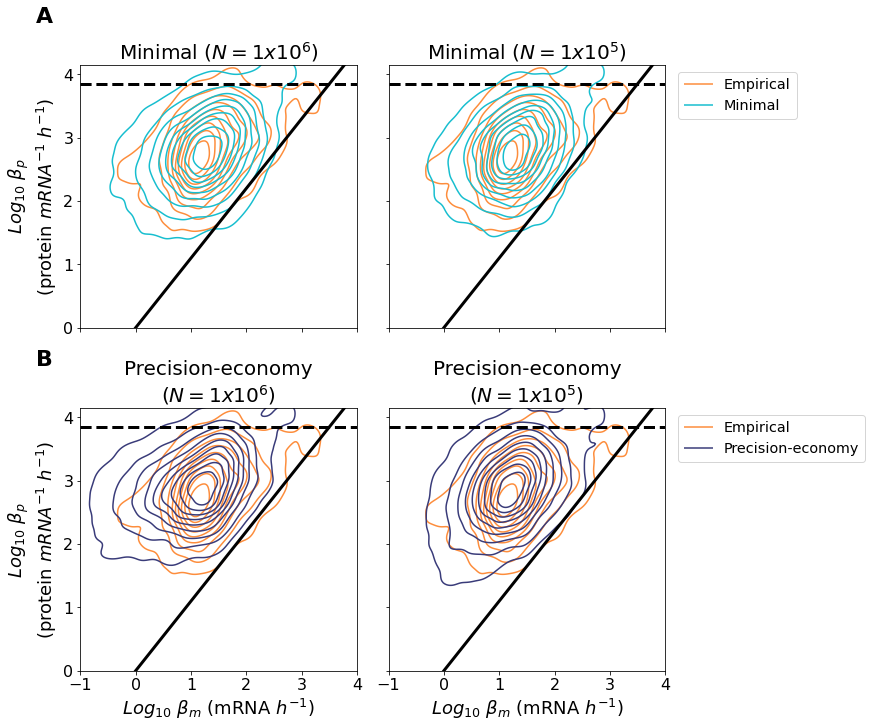

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex='col', sharey='row',
                        constrained_layout='True')

# Adding the empirical distribution
for ax in [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]:
  sns.kdeplot(x='bm', y='bp', data=genes_rates, ax=ax, shade=False, 
              cut=0, color=cm.tab20c.colors[5], label='Empirical')

# Construction of the kdeplots
sns.kdeplot(x='Bm', y='Bp', data=min_df, ax=axs[0,0], shade=False, 
            cut=0, color=cm.tab10.colors[9])
sns.kdeplot(x='Bm', y='Bp', data=min_1e5_df, ax=axs[0,1], shade=False, 
            cut=0, color=cm.tab10.colors[9], label='Minimal')
sns.kdeplot(x='Bm', y='Bp', data=cost_df, ax=axs[1,0], shade=False, 
            cut=0, color=cm.tab20b.colors[0])
sns.kdeplot(x='Bm', y='Bp', data=cost_1e5_df, ax=axs[1,1], shade=False, 
            cut=0, color=cm.tab20b.colors[0], label='Precision-economy')

# Legends
axs[0, 1].legend(loc='upper left', bbox_to_anchor=(1.02, 1),
                 fontsize='x-large')

axs[1, 1].legend(loc='upper left', bbox_to_anchor=(1.02, 1),
                 fontsize='x-large')

# Setting xlims and ylims and adding boundaries
for ax in [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]:
  ax.set_xlim(left=-1, right=4)
  ax.set_ylim(bottom=0, top=4.15)
  ax.axhline(y=np.log10(7.1e3), c='k', linestyle='--', linewidth=3)
  ax.plot([-1, 0, 1, 2, 3, 4], [-1*1.1, 0*1.1, 1*1.1, 2*1.1, 3*1.1, 4*1.1],
          c='k', linewidth=3)
  
# Adding titles
axs[0,0].set_title(r"Minimal ($N = 1 x 10^6$)", fontsize=20)
axs[0,1].set_title(r"Minimal ($N = 1 x 10^5$)", fontsize=20)
axs[1,0].set_title('Precision-economy\n' r"($N = 1 x 10^6$)", fontsize=20)
axs[1,1].set_title('Precision-economy\n' r"($N = 1 x 10^5$)", fontsize=20)
  

# Labeling of y axes
axs[0,0].set_ylabel(r"$Log_{10}$ $\beta_p$" "\n" r"(protein $mRNA^{-1}$ $h^{-1}$)",
                    fontsize=18)

axs[1,0].set_ylabel(r"$Log_{10}$ $\beta_p$" "\n" r"(protein $mRNA^{-1}$ $h^{-1}$)",
                    fontsize=18)
  
# Labeling of x axes
axs[1,0].set_xlabel(r"$Log_{10}$ $\beta_m$ (mRNA $h^{-1}$)", fontsize=18)
axs[1,1].set_xlabel(r"$Log_{10}$ $\beta_m$ (mRNA $h^{-1}$)", fontsize=18)

# Set the size of all tick labels
for ax in [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]:
  ax.tick_params(labelsize=16)

# Adding annotations
axs[0,0].annotate('A', (-0.16, 1.16), xycoords='axes fraction',
                  fontsize=22, fontweight="bold", annotation_clip=False)

axs[1,0].annotate('B', (-0.16, 1.16), xycoords='axes fraction',
                  fontsize=22, fontweight="bold", annotation_clip=False)

FigS14 = plt.gcf()
#FigS14.savefig('/content/drive/My Drive/Redaction_SA/Final_figures_v2/FigS14.pdf', 
               #bbox_inches='tight')
FigS14.savefig('/content/drive/My Drive/Redaction_SA/Final_figures_v2/FigS14.tiff', 
               bbox_inches='tight')